## 무료 체험 기간 내 레슨 소비량 파악
- 그룹 A = 무료 체험 기간일 때 구독자들의 한 달 평균 레슨 소비량
- 그룹 B = 무료 체험 종료 후 구독자들의 한달 평균 레슨 소비량

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import f
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [2]:
# 1. 파일 경로 지정
file_path = r"C:\Users\nuwba\Desktop\Codeit_2\중급1_프로젝트\주제2_원본데이터\주제2_구독서비스_프로덕트_데이터분석\complete.lesson.csv"

# 2. CSV 불러오기
complete_lesson_df = pd.read_csv(file_path, encoding="utf-8-sig")

# 3. 전처리: 시간 형식 변환 및 유저 ID 문자열 처리
complete_lesson_df['lesson_complete_time'] = pd.to_datetime(complete_lesson_df['client_event_time'])
complete_lesson_df['user_id'] = complete_lesson_df['user_id'].astype(str)

# 4. 파생 변수 추가 (월 단위 등)
complete_lesson_df['lesson_month'] = complete_lesson_df['lesson_complete_time'].dt.to_period('M')

# (확인) 불러온 데이터 상위 5개 출력
complete_lesson_df

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,lesson.id,lesson_complete_time,lesson_month
0,Wonju,2023-04-05 21:55:51.836000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9,2023-04-05 21:55:51.836,2023-04
1,Daejeon,2023-04-05 21:19:01.243000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac,2023-04-05 21:19:01.243,2023-04
2,Daejeon,2023-04-05 21:20:27.939000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854,2023-04-05 21:20:27.939,2023-04
3,Daejeon,2023-04-05 21:23:01.534000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,f22ea5dc431035305e705552bbc4f45b,2023-04-05 21:23:01.534,2023-04
4,Daejeon,2023-04-05 21:28:34.965000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,ce0bfeb7fb1259c588f437d48ab2690c,2023-04-05 21:28:34.965,2023-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405064,Seo-gu,2023-10-10 05:22:54.887000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,117.0.0.0,Web,465eb0e5c339bcc42ec3f4f14c4d00b0,f4be1a0fe0e301b03115591777fddf29,4b6cc370e587d711780ed4591634d443,2023-10-10 05:22:54.887,2023-10
5405065,Incheon,2023-10-10 05:39:15.760000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,117.0.0.0,Web,9eec721a1a1406bcf623272b5f761ce6,61b6463287573f00de13a930805a52d6,2ed4b83e65edc2b1efb193aaa3c60cf9,2023-10-10 05:39:15.760,2023-10
5405066,Incheon,2023-10-10 05:46:18.129000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,117.0.0.0,Web,9eec721a1a1406bcf623272b5f761ce6,61b6463287573f00de13a930805a52d6,db421b66bfd27eccd0e862e30b4de1be,2023-10-10 05:46:18.129,2023-10
5405067,Incheon,2023-10-10 05:50:32.927000,South Korea,NaN,Windows,Windows,complete.lesson,Korean,Chrome,117.0.0.0,Web,9eec721a1a1406bcf623272b5f761ce6,61b6463287573f00de13a930805a52d6,09c8a2d29087cb3d47823acb5f2705e3,2023-10-10 05:50:32.927,2023-10


In [5]:
# 1. 필요한 컬럼만 추출
df = complete_lesson_df[['user_id', 'lesson_complete_time', 'lesson.id']].copy()

# 2. 날짜 필터링
group_a_df = df[(df['lesson_complete_time'] >= '2023-01-01') & (df['lesson_complete_time'] <= '2023-02-28')]
group_b_df = df[(df['lesson_complete_time'] >= '2023-06-01') & (df['lesson_complete_time'] <= '2023-07-31')]

# 3. 유저별 고유 레슨 수 계산 (중복 lesson.id 제거)
group_a_unique_lessons = group_a_df.drop_duplicates(subset=['user_id', 'lesson.id']) \
                                   .groupby('user_id')['lesson.id'].count().reset_index(name='unique_lessons')
group_b_unique_lessons = group_b_df.drop_duplicates(subset=['user_id', 'lesson.id']) \
                                   .groupby('user_id')['lesson.id'].count().reset_index(name='unique_lessons')

# 4. 각 그룹의 평균 고유 레슨 수 계산
group_a_avg = group_a_unique_lessons['unique_lessons'].mean()
group_b_avg = group_b_unique_lessons['unique_lessons'].mean()

print(f"그룹 A (1~2월) 평균 고유 레슨 수: {group_a_avg:.2f}")
print(f"그룹 B (6~7월) 평균 고유 레슨 수: {group_b_avg:.2f}")

그룹 A (1~2월) 평균 고유 레슨 수: 83.18
그룹 B (6~7월) 평균 고유 레슨 수: 49.41


In [6]:
# 그룹 A와 B의 고유 레슨 수
a = group_a_unique_lessons['unique_lessons']
b = group_b_unique_lessons['unique_lessons']

# 1. F-검정 (등분산 여부 확인)
var_a = np.var(a, ddof=1)
var_b = np.var(b, ddof=1)

f_stat = max(var_a, var_b) / min(var_a, var_b)
df1 = len(a) - 1
df2 = len(b) - 1

f_p = 2 * min(f.cdf(f_stat, df1, df2), 1 - f.cdf(f_stat, df1, df2))

print(f"[F-검정 결과]")
print(f"F 통계량: {f_stat:.3f}")
print(f"p-value: {f_p:.4f}")

# 2. 등분산 여부 판단
equal_var = f_p >= 0.05  # True: 등분산 가정, False: 이분산

# 3. t-test 수행
t_stat, t_p = ttest_ind(a, b, equal_var=equal_var)

print("\n[T-검정 결과]")
print(f"T 통계량: {t_stat:.2f}")
print(f"p-value: {t_p:.4f}")
print(f"등분산 가정 여부: {equal_var}")

[F-검정 결과]
F 통계량: 1.500
p-value: 0.0000

[T-검정 결과]
T 통계량: 20.60
p-value: 0.0000
등분산 가정 여부: False


무료 체험 유무가 유저의 콘텐츠 소비 수준에 실질적인 영향을 미쳤다고 볼 수 있음

C:\Users\nuwba\AppData\Local\Temp\ipykernel_10344\2526690056.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(group_means.keys()), y=list(group_means.values()), palette='pastel')


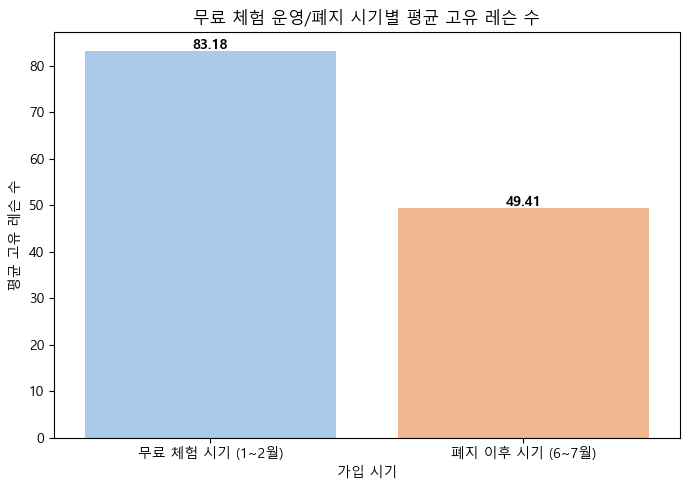

In [8]:
# 그룹별 평균 고유 레슨 수
group_means = {
    '무료 체험 시기 (1~2월)': group_a_unique_lessons['unique_lessons'].mean(),
    '폐지 이후 시기 (6~7월)': group_b_unique_lessons['unique_lessons'].mean()
}

# 시각화
plt.figure(figsize=(7,5))
sns.barplot(x=list(group_means.keys()), y=list(group_means.values()), palette='pastel')
plt.title('무료 체험 운영/폐지 시기별 평균 고유 레슨 수')
plt.ylabel('평균 고유 레슨 수')
plt.xlabel('가입 시기')

# 값 표시
for i, v in enumerate(group_means.values()):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()